Машин сургалтын хувьд градиент нь нэгээс олон оролтын хувьсагчтай функцийн дериватив юм.

Математикийн хувьд функцийн налуу (slope) гэж нэрлэгддэг градиент нь алдааны өөрчлөлттэй холбоотой бүх жингийн өөрчлөлтийг хэмждэг.

Градиент буулгалт нь алдааны функцийн хамгийн бага утгыг олох арга юм.

In [1]:
import numpy as np

Хэрэв dL / dw1 эерэг бол w1 буурч, L - ийг бууруулна.

Хэрэв dL / dw1 сөрөг байвал w1 нэмэгдэх бөгөөд энэ нь L - ийн бууруулна.

Алдааг багсагхын тулд гарсан хариуг буюу сургалтын хурд(learning rate) гэсэн хувьсагчаар үржиж болно.

Сургалтын хурд хэт их бол градиентийн арга хаа хамаагүй үсчих тул минумум руу нийлэхгүй

Сургалтын хурд хэт бага бол алгоритм маань минимум цэг рүү маш удаанаар дөхнө

In [11]:
def gradient_descent(gradient, start, learn_rate, n_iter = 50, tolerance = 1e-06):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if(np.all(np.abs(diff) <= tolerance)):
            break
        vector += diff
    return vector

In [12]:
print(gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.2))

2.210739197207331e-06


#Градиент буулгалтын төрлүүд
Batch Gradient Descent: Сургалтын бүх дээжийг нэг удаа урагшлуулдаг, дараа нь жингээ тохируулна  

Stochastic Gradient Descent: (SGD)Нэг (санамсаргүй сонгосон) дээжийг урагш дамжуулж, дараа нь жингээ тохируулна уу 

Mini-Batch Gradient Descent: Дээжийн багцыг (санамсаргүй байдлаар сонгосон) урагш дамжуулж, дараа нь жинг тохируулна уу 


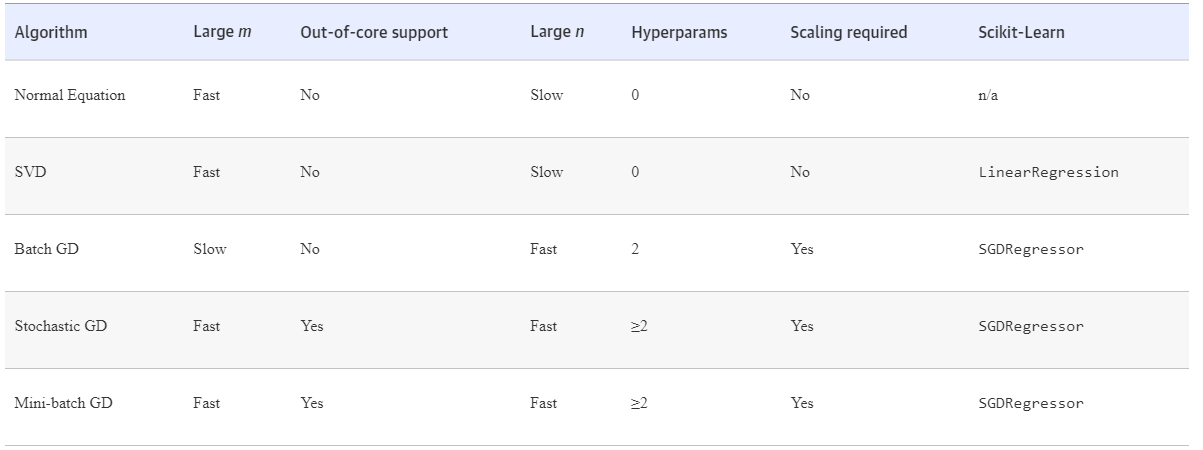

**gradient** : функц эсвэл вектор авч, таны багасгахыг оролдож буй функцийн градиентийг буцаадаг Python дуудах боломжтой объект.

**start** : (tuple, жагсаалт, NumPy массив гэх мэт) эсвэл скаляр (нэг хэмжээст бодлогын хувьд) хэлбэрээр өгөгдсөн алгоритм хайлтаа эхлүүлдэг цэг юм.

**learn_rate** : векторын шинэчлэлтийн хэмжээг хянадаг суралцах хурд юм.

**n_iter** :  давталтын тоо юм.
**myTheta** : np.random.randn(2,1)

###Batch Gradient Descent

In [31]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20831857],
       [9.79285   ]])

In [18]:
lr = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients

In [19]:
print(theta)

[[3.87868345]
 [2.9507945 ]]


In [27]:
X_new_b.dot(theta)

array([[0.49671415],
       [0.22018555]])

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [33]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure gradient_descent_plot


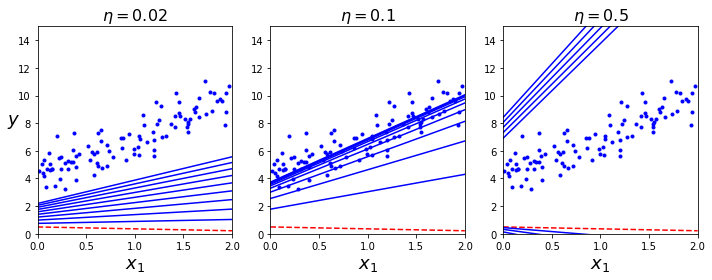

In [34]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

###Stochastic Gradient Descent

In [35]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


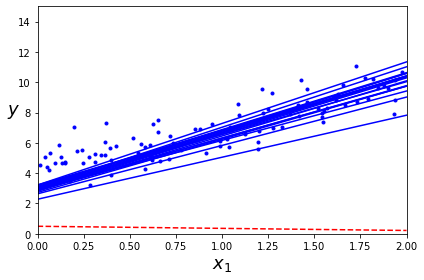

In [36]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()          

In [37]:
theta

array([[4.24042206],
       [2.81339809]])

###Mini-batch gradient descent

In [38]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [39]:
theta

array([[4.23219116],
       [2.82565088]])

In [40]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


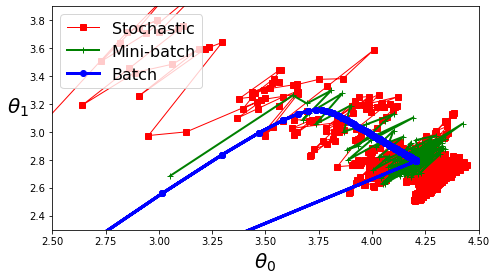

In [41]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

##Дүгнэлт

###Batch gradient descent

Багцын градиент уналт нь гүдгэр эсвэл харьцангуй гөлгөр алдаатай олон талт системд тохиромжтой. Хамгийн оновчтой шийдэл рүү шууд хөдөлдөг.

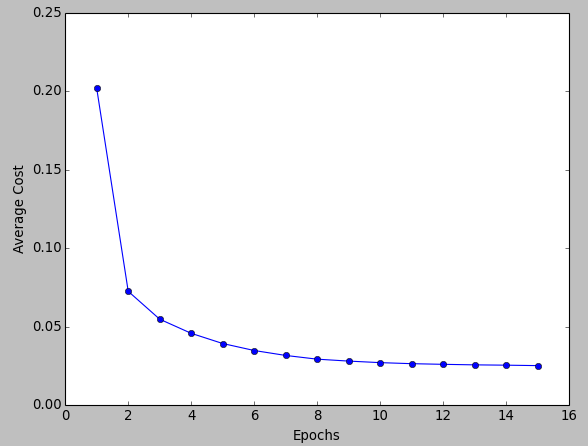

###Stochastic Gradient Descent

Мөн өртөг нь маш их хэлбэлзэлтэй байдаг тул хэзээ ч хамгийн багадаа хүрэхгүй, SGD-ийг том өгөгдлийн багцад ашиглаж болно. 

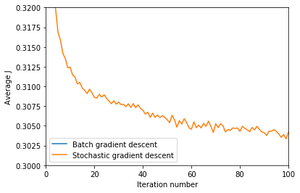

###Mini Batch Gradient Descent

Batch Gradient Descent-ийг илүү гөлгөр муруйлт хийхэд ашиглаж болно. 
Өгөгдлийн багц том үед SGD ашиглаж болно. 
BGD уналт нь минимум руу шууд нийлдэг. 

SGD нь том өгөгдлийн багцад илүү хурдан нийлдэг. 

Гэхдээ SGD-д бид нэг удаад зөвхөн нэг жишээ ашигладаг тул векторжуулсан хэрэгжилтийг хэрэгжүүлэх боломжгүй юм. 

Энэ нь тооцооллыг удаашруулж болзошгүй юм. 

Энэ асуудлыг шийдвэрлэхийн тулд mini Batch Gradient Descent болон SGD-ийн холимогийг ашигладаг.

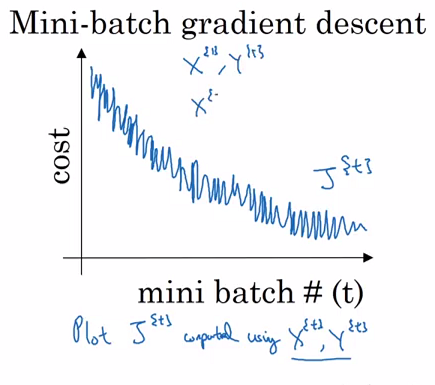